# loan eligibility prediction
### https://www.kaggle.com/vikasukani/loan-eligible-dataset

### loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan-train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
len(df.columns)

13

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
len(numerical_features)/df.shape[1]*100

38.46153846153847

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
nan_features_df=[feature for feature in df.columns if (df[feature].isnull().sum())>0] 
nan_features_df

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
len(nan_features_df)/df.shape[1] # nan columns percentage out of total

0.5384615384615384

In [12]:
# missing data from train dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#percent = (train.isnull().sum()/len(train)).sort_values(ascending=False) we can do as
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
#print(missing_data['Percent'].mean())
missing_data.head(30)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [13]:
missing_data=missing_data[missing_data['Total']>0]
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886


In [14]:
missing_data['Percent'].mean()

0.03466728711028386

***droping the nan values***

In [15]:
df.dropna().shape[0]/len(df)*100

78.17589576547232

In [16]:
df=df.dropna()

In [17]:
df.shape

(480, 13)

In [18]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [19]:
df['Loan_Status']=(df['Loan_Status']=='Y').astype(int)

In [20]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

### Eligble VS not eligble

In [21]:
eligible=df.groupby('Loan_Status').get_group(1)


In [22]:
non_eligible=df.groupby('Loan_Status').get_group(0)

In [23]:
eligible['Dependents'].value_counts()/len(eligible)*100

0     56.325301
2     19.578313
1     15.662651
3+     8.433735
Name: Dependents, dtype: float64

In [24]:
non_eligible['Dependents'].value_counts()/len(non_eligible)*100

0     58.783784
1     18.918919
2     13.513514
3+     8.783784
Name: Dependents, dtype: float64

In [25]:
eligible['Gender'].value_counts()/len(eligible)*100

Male      83.73494
Female    16.26506
Name: Gender, dtype: float64

In [26]:
non_eligible['Gender'].value_counts()/len(non_eligible)*100

Male      78.378378
Female    21.621622
Name: Gender, dtype: float64

In [27]:
eligible['Married'].value_counts()/len(eligible)*100

Yes    68.373494
No     31.626506
Name: Married, dtype: float64

In [28]:
non_eligible['Married'].value_counts()/len(non_eligible)*100

Yes    56.756757
No     43.243243
Name: Married, dtype: float64

In [29]:
eligible['Education'].value_counts()/len(eligible)*100

Graduate        81.626506
Not Graduate    18.373494
Name: Education, dtype: float64

In [30]:
non_eligible['Education'].value_counts()/len(non_eligible)*100

Graduate        75.675676
Not Graduate    24.324324
Name: Education, dtype: float64

In [31]:
eligible['Self_Employed'].value_counts()/len(eligible)*100

No     87.048193
Yes    12.951807
Name: Self_Employed, dtype: float64

In [32]:
non_eligible['Self_Employed'].value_counts()/len(non_eligible)*100

No     84.459459
Yes    15.540541
Name: Self_Employed, dtype: float64

In [33]:
df['ApplicantIncome'].max()

81000

In [34]:
eligible['ApplicantIncome'].max()

39999

In [35]:
med=df['ApplicantIncome'].median()
med

3859.0

In [36]:
(eligible['ApplicantIncome']<med).value_counts()/len(eligible)*100

False    50.0
True     50.0
Name: ApplicantIncome, dtype: float64

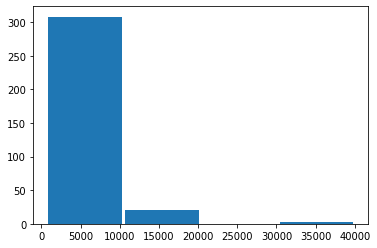

In [37]:
plt.hist(eligible['ApplicantIncome'],rwidth=0.95,bins=4)
plt.show()

In [38]:
non_eligible['ApplicantIncome'].max()

81000

In [39]:
(non_eligible['ApplicantIncome']<df['ApplicantIncome'].median()).value_counts()/len(non_eligible)*100

False    50.675676
True     49.324324
Name: ApplicantIncome, dtype: float64

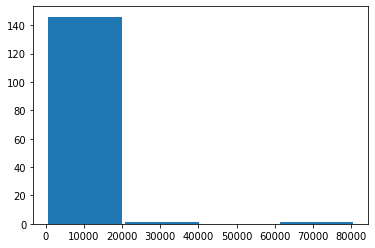

In [40]:
plt.hist(non_eligible['ApplicantIncome'],rwidth=0.95,bins=4)
plt.show()

In [41]:
(eligible['CoapplicantIncome']<df['CoapplicantIncome'].median()).value_counts()/len(eligible)*100

False    51.204819
True     48.795181
Name: CoapplicantIncome, dtype: float64

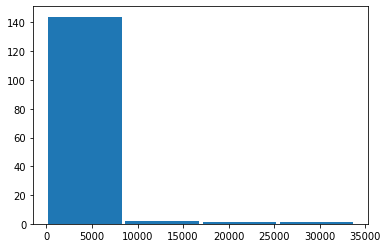

In [42]:
plt.hist(non_eligible['CoapplicantIncome'],rwidth=0.95,bins=4)
plt.show()

In [43]:
(non_eligible['CoapplicantIncome']<df['CoapplicantIncome'].median()).value_counts()/len(non_eligible)*100

True     52.702703
False    47.297297
Name: CoapplicantIncome, dtype: float64

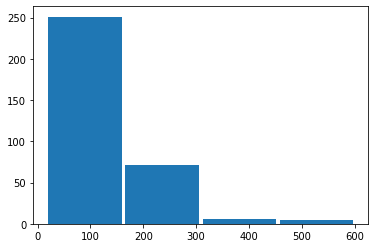

In [44]:
plt.hist(eligible['LoanAmount'],rwidth=0.95,bins=4)
plt.show()

In [45]:
(eligible['LoanAmount']<df['LoanAmount'].quantile(0.75)).value_counts()/len(eligible)*100

True     76.807229
False    23.192771
Name: LoanAmount, dtype: float64

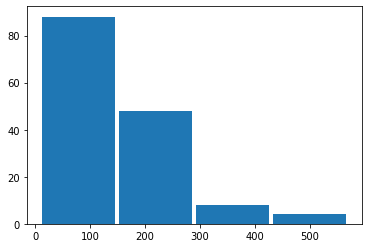

In [46]:
plt.hist(non_eligible['LoanAmount'],rwidth=0.95,bins=4)
plt.show()

In [47]:
(non_eligible['LoanAmount']<df['LoanAmount'].quantile(0.75)).value_counts()/len(non_eligible)*100

True     69.594595
False    30.405405
Name: LoanAmount, dtype: float64

In [48]:
eligible['Loan_Amount_Term'].value_counts()/len(eligible)*100

360.0    87.951807
180.0     7.228916
300.0     1.204819
480.0     1.204819
120.0     0.903614
84.0      0.602410
60.0      0.602410
240.0     0.301205
Name: Loan_Amount_Term, dtype: float64

In [49]:
non_eligible['Loan_Amount_Term'].value_counts()/len(non_eligible)*100

360.0    80.405405
180.0     8.108108
480.0     5.405405
300.0     3.378378
36.0      1.351351
84.0      0.675676
240.0     0.675676
Name: Loan_Amount_Term, dtype: float64

In [50]:
(eligible['Loan_Amount_Term']<df['Loan_Amount_Term'].median()).value_counts()/len(eligible)*100

False    89.156627
True     10.843373
Name: Loan_Amount_Term, dtype: float64

In [51]:
(non_eligible['Loan_Amount_Term']<df['Loan_Amount_Term'].median()).value_counts()/len(non_eligible)*100

False    85.810811
True     14.189189
Name: Loan_Amount_Term, dtype: float64

In [52]:
eligible['Credit_History'].value_counts()/len(eligible)*100

1.0    97.891566
0.0     2.108434
Name: Credit_History, dtype: float64

In [53]:
non_eligible['Credit_History'].value_counts()/len(non_eligible)*100

1.0    57.432432
0.0    42.567568
Name: Credit_History, dtype: float64

In [54]:
eligible['Property_Area'].value_counts()/len(eligible)*100

Semiurban    44.879518
Urban        29.518072
Rural        25.602410
Name: Property_Area, dtype: float64

In [55]:
non_eligible['Property_Area'].value_counts()/len(non_eligible)*100

Rural        36.486486
Urban        35.135135
Semiurban    28.378378
Name: Property_Area, dtype: float64

***converting catagarical data into 0 and 1***

In [56]:
catagarical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
catagarical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [57]:
catg_2_features=[]
for feature in catagarical_features:
    if len(df[feature].unique())==2:
        catg_2_features.append(feature)
catg_2_features

['Gender', 'Married', 'Education', 'Self_Employed']

In [58]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [59]:
for feature in catg_2_features:
    df[feature]=(df[feature]==df[feature].value_counts().keys()[0]).astype(int)

In [60]:
dependents = pd.get_dummies(df['Dependents'])
dependents

,0,1,2,3+
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0
...,...,...,...,...
609,1,0,0,0
610,0,0,0,1
611,0,1,0,0
612,0,0,1,0


In [61]:
area = pd.get_dummies(df['Property_Area'])

In [62]:
area.columns[0]

'Rural'

In [63]:
area

,Rural,Semiurban,Urban
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [64]:
area_dep_merged = pd.concat([df,area,dependents],axis='columns')
area_dep_merged 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
1,LP001003,1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0,0,1,0,0
2,LP001005,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,1,1,0,0,0
3,LP001006,1,1,0,0,1,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,1,1,0,0,0
4,LP001008,1,0,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,1,1,0,0,0
5,LP001011,1,1,2,1,0,5417,4196.0,267.0,360.0,1.0,Urban,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,1,2900,0.0,71.0,360.0,1.0,Rural,1,1,0,0,1,0,0,0
610,LP002979,1,1,3+,1,1,4106,0.0,40.0,180.0,1.0,Rural,1,1,0,0,0,0,0,1
611,LP002983,1,1,1,1,1,8072,240.0,253.0,360.0,1.0,Urban,1,0,0,1,0,1,0,0
612,LP002984,1,1,2,1,1,7583,0.0,187.0,360.0,1.0,Urban,1,0,0,1,0,0,1,0


In [65]:
df =area_dep_merged.drop(['Property_Area','Semiurban','Dependents','0'], axis='columns')
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Urban,1,2,3+
1,LP001003,1,1,1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0
2,LP001005,1,1,1,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,0,0
3,LP001006,1,1,0,1,2583,2358.0,120.0,360.0,1.0,1,0,1,0,0,0
4,LP001008,1,0,1,1,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0
5,LP001011,1,1,1,0,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,1,2900,0.0,71.0,360.0,1.0,1,1,0,0,0,0
610,LP002979,1,1,1,1,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1
611,LP002983,1,1,1,1,8072,240.0,253.0,360.0,1.0,1,0,1,1,0,0
612,LP002984,1,1,1,1,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,0


In [66]:
numerical_features_2 = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features_2 

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'Rural',
 'Urban',
 '1',
 '2',
 '3+']

### relationship bw features

In [67]:
c_matrix=df.corr()

In [68]:
c_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.529390
Married              0.112321
2                    0.073368
Education            0.068437
Gender               0.064504
Self_Employed        0.034715
3+                  -0.005784
Loan_Amount_Term    -0.007798
1                   -0.040350
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
Urban               -0.055964
LoanAmount          -0.071753
Rural               -0.110817
Name: Loan_Status, dtype: float64

In [69]:
strong_relation_features=[]
for feature in c_matrix['Loan_Status'].sort_values(ascending=False).keys():
    if c_matrix['Loan_Status'][feature]>=0.04 or c_matrix['Loan_Status'][feature]<=-0.04:
        strong_relation_features.append(feature) 

In [70]:
strong_relation_features.remove('Loan_Status')

In [71]:
strong_relation_features

['Credit_History',
 'Married',
 '2',
 'Education',
 'Gender',
 '1',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Urban',
 'LoanAmount',
 'Rural']

In [72]:
df_strong=df[strong_relation_features]

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

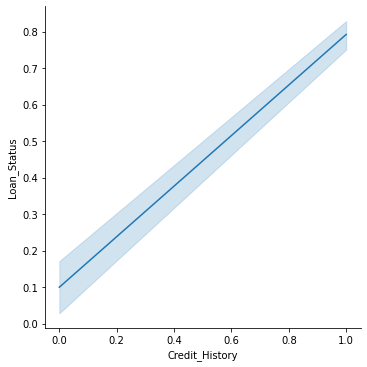

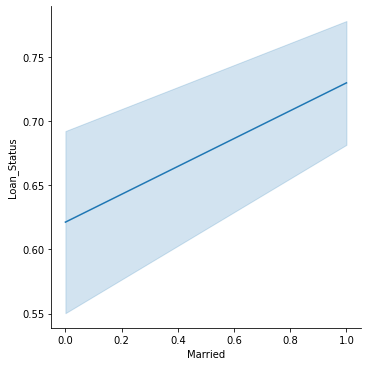

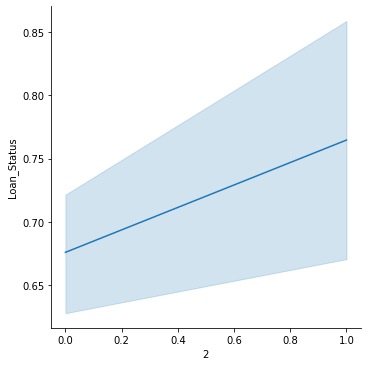

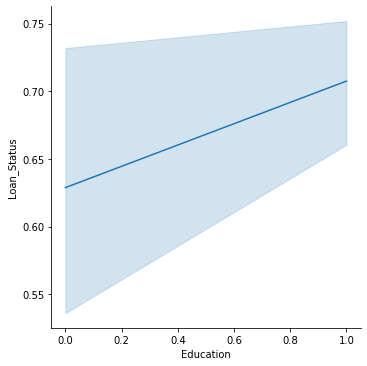

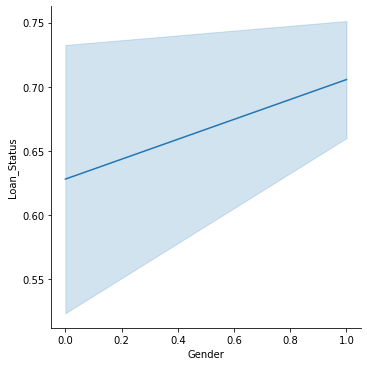

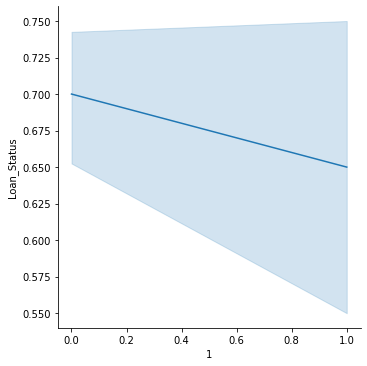

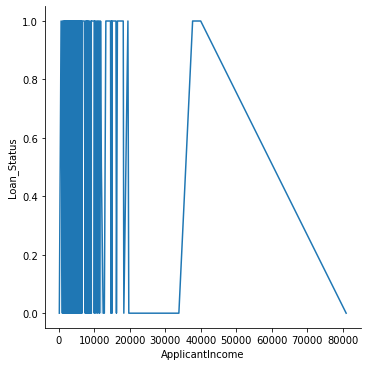

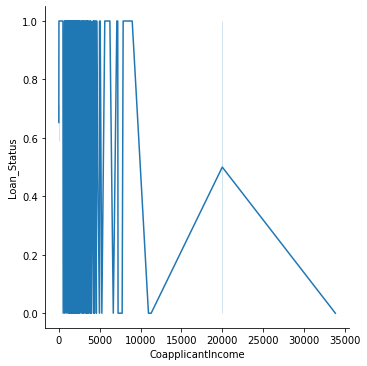

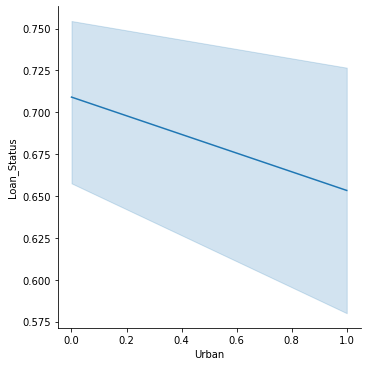

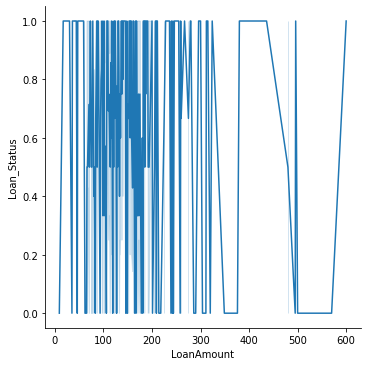

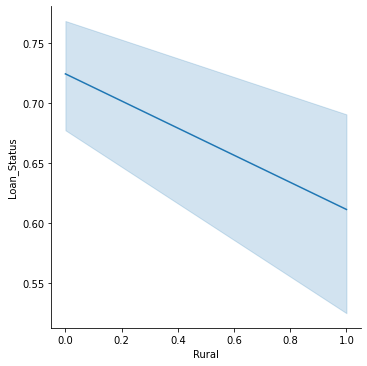

In [74]:
for feature in strong_relation_features:
    sns.relplot(x=feature,y="Loan_Status",data=df,kind='line')

In [75]:
# import seaborn as sns
# sns.pairplot(df_strong)

In [76]:
#sns.relplot(x="Credit_History",y="Loan_Status",data=df,kind='line')

In [77]:
#sns.relplot(x="Dependents",y="Loan_Status",data=df,kind='line')

In [78]:
#sns.relplot(x="Property_Area",y="Loan_Status",data=df,kind='line')

In [79]:
#sns.relplot(x="Education",y="Loan_Status",data=df,kind='line')

In [80]:
#sns.relplot(x="Self_Employed",y="Loan_Status",data=df,kind='line')

In [81]:
#sns.relplot(x="ApplicantIncome",y="Loan_Status",data=df)

In [82]:
#sns.relplot(x="ApplicantIncome",y="Loan_Status",data=df,kind='line')

In [83]:
#sns.relplot(x="CoapplicantIncome",y="Loan_Status",data=df)

In [84]:
#sns.relplot(x="CoapplicantIncome",y="Loan_Status",data=df,kind='line')

In [85]:
#sns.relplot(x="LoanAmount",y="Loan_Status",data=df)

In [86]:
#sns.relplot(x="LoanAmount",y="Loan_Status",data=df,kind='line')

In [87]:
#sns.relplot(x="Loan_Amount_Term",y="Loan_Status",data=df)

In [88]:
#sns.relplot(x="Loan_Amount_Term",y="Loan_Status",data=df,kind='line')

In [89]:
#sns.relplot(x="Property_Area",y="Loan_Status",data=df,kind='line')

### dropped un relevant columns

In [90]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Rural', 'Urban',
       '1', '2', '3+'],
      dtype='object')

In [91]:
# X=df.drop(['Loan_ID','Loan_Status','3+'],axis='columns')
# y=df['Loan_Status']

In [92]:
X=df[strong_relation_features]
y=df['Loan_Status']

In [93]:
X.columns

Index(['Credit_History', 'Married', '2', 'Education', 'Gender', '1',
       'ApplicantIncome', 'CoapplicantIncome', 'Urban', 'LoanAmount', 'Rural'],
      dtype='object')

In [94]:
X=X.rename(columns={"2": "two_dependant", "1": "one_dependant"})

In [95]:
X.columns

Index(['Credit_History', 'Married', 'two_dependant', 'Education', 'Gender',
       'one_dependant', 'ApplicantIncome', 'CoapplicantIncome', 'Urban',
       'LoanAmount', 'Rural'],
      dtype='object')

### cross validation method to check accuracy of all models

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.727083,0.80625,0.7875,0.689583


### split data into train and test part to make prediction

In [97]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### creating model

In [98]:
# As Random Forest and logistic regression perform at high accuracy so i choose one of them

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=20)


### fitting data

In [99]:
model.fit(X_train,y_train)

LogisticRegression()

### saving model

In [100]:
import pickle
pickle.dump(model, open('model_Loan_eligibility_predictions.pkl','wb'))

### percentage of accuracy

In [101]:
model.score(X_test,y_test)

0.8333333333333334

In [102]:
model.predict(X_test[:5])

array([1, 1, 1, 0, 1])

In [103]:
X_test[:5]

,Credit_History,Married,two_dependant,Education,Gender,one_dependant,ApplicantIncome,CoapplicantIncome,Urban,LoanAmount,Rural
92,1.0,1,1,0,1,0,3273,1820.0,1,81.0,0
529,1.0,0,0,0,1,0,6783,0.0,0,130.0,0
505,1.0,1,1,1,1,0,3510,4416.0,0,243.0,1
358,0.0,1,0,0,1,0,3000,1666.0,1,100.0,0
512,1.0,1,1,1,1,0,3283,2035.0,1,148.0,0


### Accuracy VS Precision VS Recall VS f1_score

In [104]:
from sklearn import metrics
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.8333333333333334
Precision: 0.8095238095238095
Recall: 1.0
F1_score: 0.8947368421052632


### confusion matrix

In [105]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[12 16]
 [ 0 68]]


### confusion matrix heatmap

Text(69.0, 0.5, 'Truth')

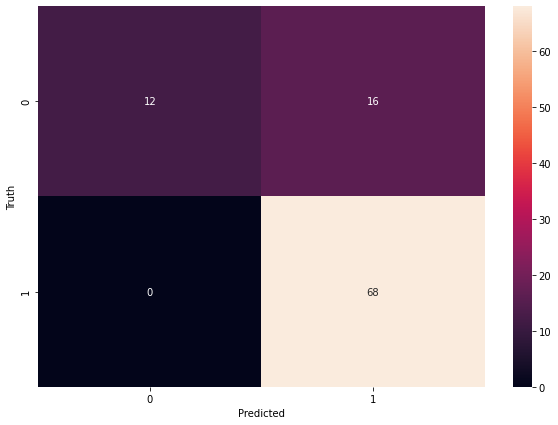

In [106]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# working on test.csv

***loading test data***

In [107]:
df_test=pd.read_csv('loan-test.csv')

***cheking for Null values***

In [108]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

***as total rows are 367 including null values***

In [109]:
df_test.shape

(367, 12)

***removing rows having Null values***

In [110]:
df_test=df_test.dropna()

***making a copy of df_test for making changes not affected actual copy***

In [111]:
df=df_test.copy()

### conversion of strings into integers of form 1 and 0

In [112]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        if len(df[feature].unique())==2:
            df[feature]=(df[feature]==df[feature].value_counts().keys()[0]).astype(int)    

In [113]:
numerical_features_2 = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features_2

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [114]:
dependents = pd.get_dummies(df['Dependents'])
dependents

,0,1,2,3+
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
4,1,0,0,0
5,1,0,0,0
...,...,...,...,...
361,0,1,0,0
362,0,0,0,1
363,1,0,0,0
365,1,0,0,0


In [115]:
area = pd.get_dummies(df['Property_Area'])

In [116]:
area_dep_merged = pd.concat([df,area,dependents],axis='columns')
area_dep_merged 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Rural,Semiurban,Urban,0,1,2,3+
0,LP001015,1,1,0,1,1,5720,0,110.0,360.0,1.0,Urban,0,0,1,1,0,0,0
1,LP001022,1,1,1,1,1,3076,1500,126.0,360.0,1.0,Urban,0,0,1,0,1,0,0
2,LP001031,1,1,2,1,1,5000,1800,208.0,360.0,1.0,Urban,0,0,1,0,0,1,0
4,LP001051,1,0,0,0,1,3276,0,78.0,360.0,1.0,Urban,0,0,1,1,0,0,0
5,LP001054,1,1,0,0,0,2165,3422,152.0,360.0,1.0,Urban,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,1,1,2269,2167,99.0,360.0,1.0,Semiurban,0,1,0,0,1,0,0
362,LP002971,1,1,3+,0,0,4009,1777,113.0,360.0,1.0,Urban,0,0,1,0,0,0,1
363,LP002975,1,1,0,1,1,4158,709,115.0,360.0,1.0,Urban,0,0,1,1,0,0,0
365,LP002986,1,1,0,1,1,5000,2393,158.0,360.0,1.0,Rural,1,0,0,1,0,0,0


In [117]:
df =area_dep_merged.drop(['Property_Area','Semiurban','Dependents','0'], axis='columns')
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Urban,1,2,3+
0,LP001015,1,1,1,1,5720,0,110.0,360.0,1.0,0,1,0,0,0
1,LP001022,1,1,1,1,3076,1500,126.0,360.0,1.0,0,1,1,0,0
2,LP001031,1,1,1,1,5000,1800,208.0,360.0,1.0,0,1,0,1,0
4,LP001051,1,0,0,1,3276,0,78.0,360.0,1.0,0,1,0,0,0
5,LP001054,1,1,0,0,2165,3422,152.0,360.0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,1,2269,2167,99.0,360.0,1.0,0,0,1,0,0
362,LP002971,1,1,0,0,4009,1777,113.0,360.0,1.0,0,1,0,0,1
363,LP002975,1,1,1,1,4158,709,115.0,360.0,1.0,0,1,0,0,0
365,LP002986,1,1,1,1,5000,2393,158.0,360.0,1.0,1,0,0,0,0


***droping two columns as that are not involved in predictions***

In [118]:
#test_x=df.drop(['Loan_ID','Dependents'],axis='columns')

In [119]:
test_x=df[strong_relation_features]

***make predictions on the basis of model used***

In [120]:
test_pred=model.predict(test_x)

***adding predictions to actual test dataset***

In [121]:
df_test['Loan Eligibility']=test_pred

***replacing 1,0 in the form of Yes and No in predictions column***

In [122]:
df_test['Loan Eligibility']=df_test['Loan Eligibility'].replace([1,0],['Yes','No'])

***finally test_dataset is ready with predictions***

In [123]:
#df_test.to_csv('loan eligibility predictions.csv')

### using saved model for predictions

In [124]:
model_ = pickle.load(open('model_Loan_eligibility_predictions.pkl','rb'))

In [125]:
X_test

,Credit_History,Married,two_dependant,Education,Gender,one_dependant,ApplicantIncome,CoapplicantIncome,Urban,LoanAmount,Rural
92,1.0,1,1,0,1,0,3273,1820.0,1,81.0,0
529,1.0,0,0,0,1,0,6783,0.0,0,130.0,0
505,1.0,1,1,1,1,0,3510,4416.0,0,243.0,1
358,0.0,1,0,0,1,0,3000,1666.0,1,100.0,0
512,1.0,1,1,1,1,0,3283,2035.0,1,148.0,0
...,...,...,...,...,...,...,...,...,...,...,...
281,1.0,1,0,1,1,0,3927,800.0,0,112.0,0
299,1.0,1,0,1,1,1,2014,2925.0,1,113.0,0
522,1.0,1,0,1,1,0,5677,1424.0,0,100.0,1
33,1.0,1,0,1,1,0,3500,1667.0,0,114.0,0


In [126]:
print(model_.predict([[1,1,1,0,1,1,3273,1820,1,81,0]]))

[1]


In [127]:
(model.predict(X_test))[0]

1

In [132]:
(model.predict(X_test))[3]

0